# SMS Spam Detection

Le fichier que nous allons utiliser contient une collection de plus de 5 000 messages téléphoniques SMS. En utilisant des exemples étiquetés de messages non sollicités et de messages non sollicités, nous **entraînerons un modèle d'apprentissage automatique pour apprendre à faire la distinction entre les messages non sollicités et les messages non sollicités automatiquement**. Ensuite, avec un modèle entraîné, nous serons en mesure de **classer des messages arbitraires non étiquetés** comme étant des messages non sollicités ou des messages non sollicités.

Ici, je vais développer un détecteur de spam SMS en utilisant 

Traduit avec DeepL.com (version gratuite)

In [1]:
#!python -m pip install 

# Summary of building the model

Permettez-moi de vous donner une brève idée de ce que je vais suivre dans ce carnet pour créer le modèle :

Tout d'abord, essayez de comprendre les données et leur distribution avec une AED de base à l'aide des bibliothèques Pandas et Matplotlib. Vérifiez également l'absence de valeurs aberrantes en analysant les graphiques de distribution.

*À l'aide de la bibliothèque NLTK, supprimez d'abord la ponctuation et les symboles spéciaux de tous les SMS, puis mettez-les en minuscules. Vous pouvez même diviser chaque SMS en phrases et en mots après avoir supprimé la ponctuation et les symboles spéciaux. Ici, je divise simplement chaque SMS en mots avec des espaces blancs. Cependant, la tokenisation et l'analyse peuvent être la meilleure idée pour diviser les textes. Notez que la conversion de toutes les données en minuscules facilite le processus de prétraitement et les étapes ultérieures de l'application NLP.

*Supprimez ensuite les mots-clés de tous les SMS.

*Après avoir traité chaque SMS, nous créerons le WordCloud pour les messages Spam et Ham afin d'obtenir une représentation visuelle des mots largement utilisés dans les messages Spam et Ham.



* Nous pouvons maintenant normaliser le texte par **lemmatisation** ou **stemming** de NLTK ou en le distinguant par **partie du discours (POC)**. Cependant, ces méthodes ne fonctionnent pas toujours bien, en particulier pour les messages textuels, car de nombreuses personnes ont tendance à utiliser des abréviations ou des abréviations abrégées dans les SMS. Par exemple, « IDK » pour « je ne sais pas » ou « wut » pour « quoi ». Nous ne traiterons donc pas le texte par ces méthodes.

* Pour l'instant, nous avons les messages sous forme de listes de jetons et nous devons maintenant convertir chacun de ces messages en un vecteur avec lequel les modèles algorithmiques de SciKit Learn peuvent travailler.

    Nous le ferons en trois étapes en utilisant le modèle **bag-of-words (BOW)** :
    

    * Compter le nombre de fois qu'un mot apparaît dans chaque message (connu sous le nom de fréquence des termes - **TF**).
    
    * Pondérer les comptes, de sorte que les mots fréquents aient un poids plus faible (fréquence inverse du document - **IDF**).
    
    * Normaliser les vecteurs à une longueur unitaire, pour faire abstraction de la longueur du texte original (norme L2).
    


* Une fois les messages représentés sous forme de vecteurs, nous pouvons enfin entraîner notre classificateur de spam/ham. Nous pouvons maintenant utiliser presque tous les **algorithmes de classification** comme Random Forest, Naive Bayes, etc.

## Natural Language Processing (NLP)

Ici, les messages sont rédigés dans un langage humain que l'ordinateur ne peut pas comprendre. Nous devons donc utiliser le traitement du langage naturel pour permettre aux ordinateurs de lire les SMS en langage humain (naturel) et de déterminer quelles parties sont importantes.

Le traitement du langage naturel (TLN) est donc une branche de l'intelligence artificielle qui aide les ordinateurs à comprendre, interpréter et manipuler le langage humain.

Le NLP permet aux ordinateurs de lire le texte, d'entendre la parole, de l'interpréter, de mesurer le sentiment et de déterminer quelles parties sont importantes.

Les données d'entrée et de sortie d'un système NLP peuvent être les suivantes
* la parole
* Texte écrit



# Load the Data

Importons d'abord les bibliothèques Python, puis le fichier via pandas pour obtenir une liste de toutes les lignes de messages textuels :

In [5]:
!python -m pip install wordcloud

     -------------------------------------- 300.2/300.2 KB 4.6 MB/s eta 0:00:00


You should consider upgrading via the 'C:\Users\gcher\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip' command.


In [6]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
%matplotlib inline

import string
import nltk
from nltk.corpus import stopwords

from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import WordNetLemmatizer

from sklearn.model_selection import train_test_split 
from sklearn import metrics

In [7]:
messages = pd.read_csv('spam.csv',encoding = 'latin-1')
messages.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [6]:
messages.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


### Supprimer les colonnes inutiles du jeu de données et renommer les noms des colonnes.

In [8]:
messages = messages.drop(labels = ["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis = 1)
messages.columns = ["label", "message"]

In [8]:
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# Exploratory Data Analysis

Vérifions certaines statistiques à l'aide de graphiques et des méthodes intégrées à pandas !

In [9]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


Cet ensemble de données contient un total de 5572 SMS avec 2 colonnes : lable et message.

In [12]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


* Il y a deux étiquettes uniques.
* Il y a des messages répétés car le nombre d'étiquettes uniques est inférieur au nombre de messages, en raison de la présence de certaines virgules.

Utilisons **groupby** pour utiliser la description par étiquette, de cette façon nous pouvons commencer à réfléchir aux caractéristiques qui séparent le ham du spam !

In [13]:
messages.groupby('label').describe().T

label                              ham  \
message count                     4825   
        unique                    4516   
        top     Sorry, I'll call later   
        freq                        30   

label                                                        spam  
message count                                                 747  
        unique                                                653  
        top     Please call our customer service representativ...  
        freq                                                    4

* 4825 messages ham dont 4516 sont uniques...
* 747 messages span dont 653 sont uniques.
* « Sorry, I'll call later » est le message ham le plus populaire avec une répétition de 30 fois.
* « Please call our customer service representativ...» est le message spam le plus populaire, répété 4 fois.

Au fur et à mesure que nous poursuivons notre analyse, nous voulons commencer à réfléchir aux fonctionnalités que nous allons utiliser. Cela va de pair avec l'idée générale de **l'ingénierie des fonctionnalités**. Plus la connaissance du domaine est bonne, plus il est possible d'en extraire des caractéristiques. 

**L'ingénierie des caractéristiques est le processus qui consiste à utiliser la connaissance du domaine pour extraire des caractéristiques des données brutes à l'aide de techniques d'exploration de données. Ces caractéristiques peuvent être utilisées pour améliorer les performances des algorithmes d'apprentissage automatique. L'ingénierie des caractéristiques peut être considérée comme un apprentissage automatique appliqué**.

Créons une nouvelle fonctionnalité pour détecter la longueur des messages textuels :

In [14]:
messages['length'] = messages['message'].apply(len)
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [15]:
# Count the frequency of top 5 messages.
messages['message'].value_counts().rename_axis(['message']).reset_index(name='counts').head()

,message,counts
0,"Sorry, I'll call later",30
1,I cant pick the phone right now. Pls send a me...,12
2,Ok...,10
3,7 wonders in My WORLD 7th You 6th Ur style 5th...,4
4,"Say this slowly.? GOD,I LOVE YOU &amp; I NEED ...",4



Il semble que les gens soient très occupés. « Sorry, i'll call later » arrive en tête de liste avec 30 messages et « I cant pick the phone right now. Pls send a message» arrive en deuxième position avec 12 messages.

Il y a aussi beaucoup de « Ok...Okie. ».

## Data Visualization


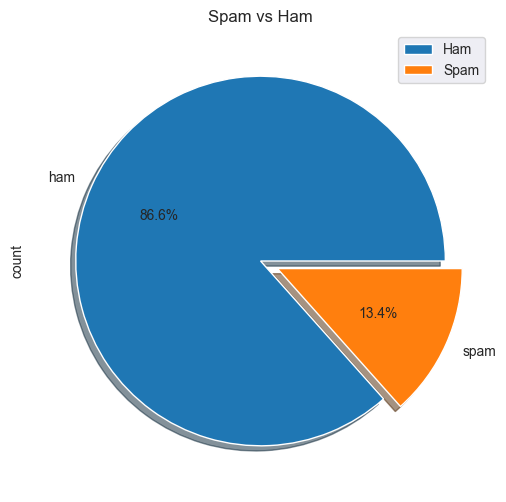

In [16]:
messages["label"].value_counts().plot(kind = 'pie',explode=[0, 0.1],figsize=(6, 6),autopct='%1.1f%%',shadow=True)
plt.title("Spam vs Ham")
plt.legend(["Ham", "Spam"])
plt.show()

**A lot of messages are actually not spam. About 86% of our dataset consists of normal messages.**

Text(0, 0.5, 'Frequency')

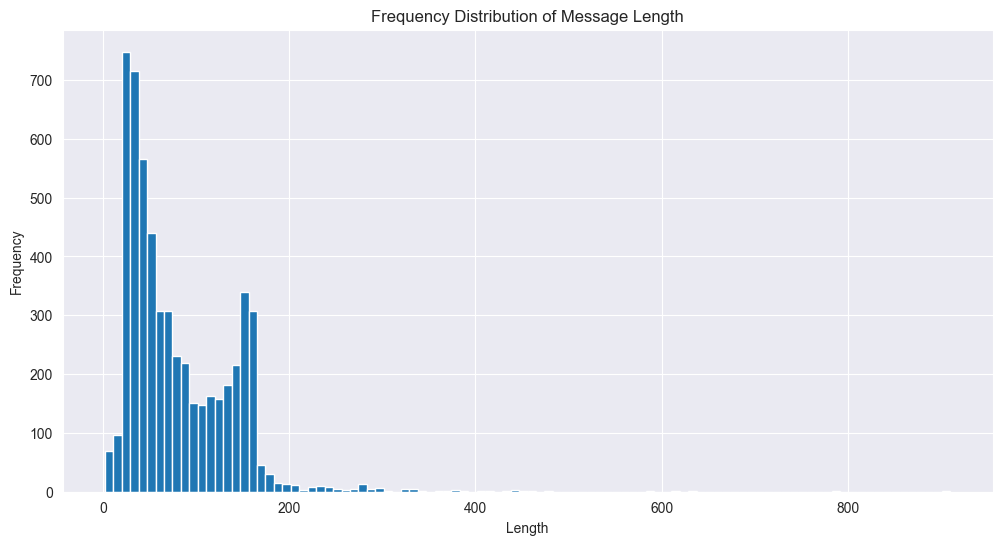

In [17]:
plt.figure(figsize=(12,6))
messages['length'].plot(bins=100, kind='hist') # with 100 length bins (100 length intervals) 
plt.title("Frequency Distribution of Message Length")
plt.xlabel("Length")
plt.ylabel("Frequency")

La plupart des messages ont une longueur inférieure à 200. Notez que l'axe des abscisses va jusqu'à 1000, ce qui doit signifier qu'il y a un très long message !

In [18]:
messages['length'].describe()

count    5572.000000
mean       80.118808
std        59.690841
min         2.000000
25%        36.000000
50%        61.000000
75%       121.000000
max       910.000000
Name: length, dtype: float64

Woah ! 910 caractères, utilisons le masquage pour trouver ce message :

In [19]:
messages[messages['length'] == 910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

essayer de voir si la longueur du message est une caractéristique permettant de distinguer les messages ham et spam:

array([<Axes: title={'center': 'ham'}>, <Axes: title={'center': 'spam'}>],
      dtype=object)

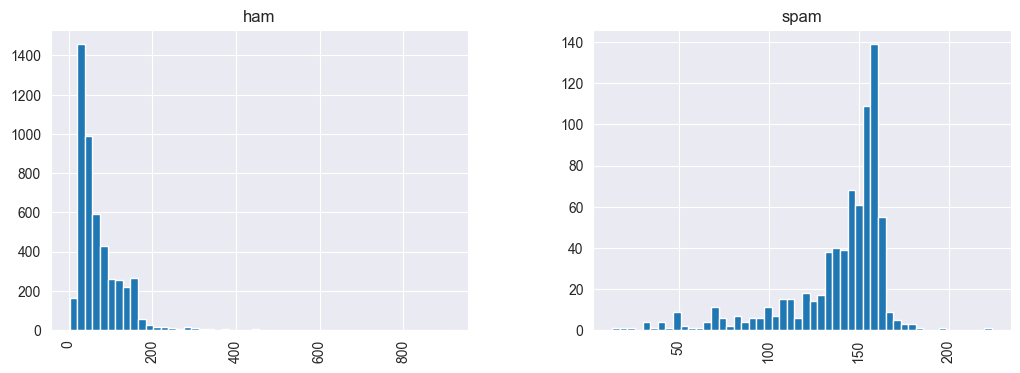

In [23]:
messages.hist(column='length', by='label', bins=50,figsize=(12,4))

Il semble que les messages de spam soient généralement plus longs. Peut-être que la longueur du message peut devenir une caractéristique permettant de prédire si le message est un spam ou un spam ?

Commençons maintenant à traiter les données afin de pouvoir les utiliser avec SciKit Learn !

# Text Pre-processing

Le principal problème de nos données est qu'elles sont toutes au format texte (chaînes de caractères). Les algorithmes de classification auront besoin d'une sorte de vecteur de caractéristiques numériques afin d'effectuer la tâche de classification. Il existe en fait de nombreuses méthodes pour convertir un **corpus** en un format vectoriel. La plus simple est l'approche [bag-of-words] (https://github.com/dktalaicha/Natural-Language-Processing/blob/master/Natural-Language-Processing-Basics.ipynb), où chaque mot unique d'un texte est représenté par un nombre.

Dans cette section, nous allons convertir les messages bruts (séquence de caractères) en vecteurs (séquences de nombres).

Dans un premier temps, nous allons écrire une fonction qui divisera un message en mots individuels et renverra une liste. Nous allons également supprimer les mots les plus courants, c'est-à-dire les **mots d'arrêt**, ('le', 'a', etc.). Pour ce faire, nous utiliserons la bibliothèque NLTK.

Créons une fonction qui traitera la chaîne de la colonne message, puis nous pourrons utiliser **apply()** dans pandas pour traiter tout le texte du DataFrame.

Commençons par supprimer la ponctuation. Nous pouvons utiliser la bibliothèque **string** intégrée à Python pour obtenir une liste rapide de toutes les ponctuations possibles :

In [21]:
def text_preprocess(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    nopunc = nopunc.lower()
    
    # Now just remove any stopwords and non alphabets
    nostop=[word for word in nopunc.split() if word.lower() not in stopwords.words('english') and word.isalpha()]
    
    return nostop

Maintenant, nous allons "tokeniser" ces messages de spam ou de ham. La tokenisation est le terme utilisé pour décrire le processus de conversion des chaînes de texte normales en une liste de tokens (mots recherchés).

Voyons un exemple de sortie sur une colonne :


<div class="alert alert-block alert-warning">
<b>Note:</b> 
erreurs pour des symboles que nous n'avons pas pris en compte ou qui ne figurent pas dans Unicode (comme le symbole de la livre sterling).
</div>

## Lets study individual spam/ham messages

In [22]:
spam_messages = messages[messages["label"] == "spam"]["message"]
ham_messages = messages[messages["label"] == "ham"]["message"]
print("No of spam messages : ",len(spam_messages))
print("No of ham messages : ",len(ham_messages))

No of spam messages :  747
No of ham messages :  4825


## Wordcloud for Spam Messages

In [23]:
# This may take a while....
import nltk
nltk.download('stopwords')
spam_words = text_preprocess(spam_messages)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gcher\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [25]:
# lets print some spam words
spam_words[:20]

['free',
 'entry',
 'wkly',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkts',
 'may',
 'text',
 'fa',
 'receive',
 'entry',
 'txt',
 'apply',
 'hey',
 'darling',
 'word',
 'like']

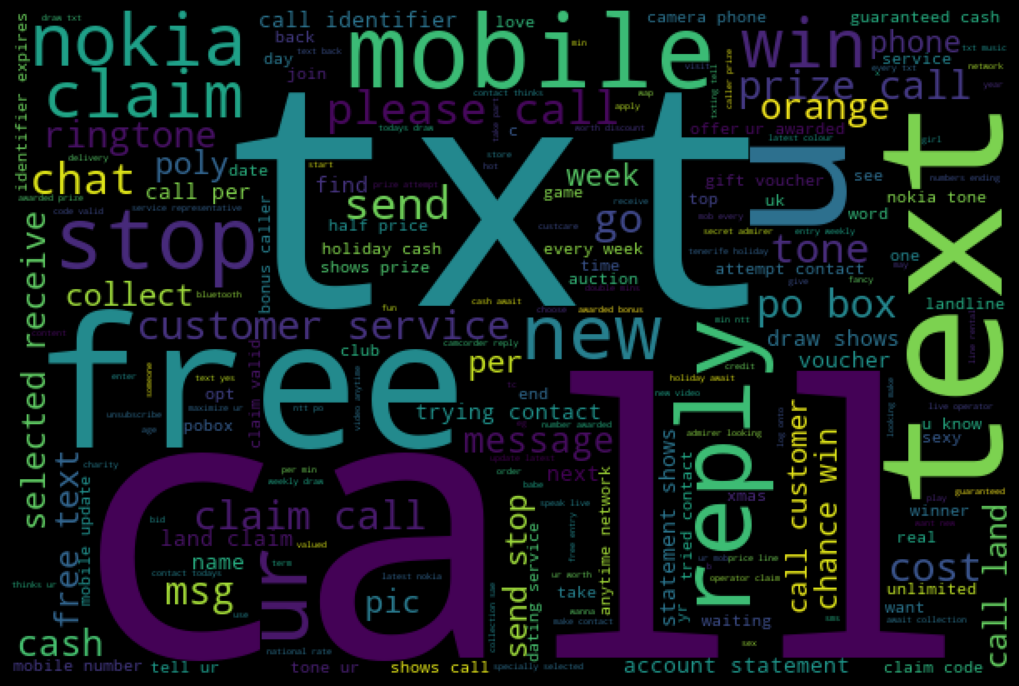

In [26]:
spam_wordcloud = WordCloud(width=600, height=400).generate(' '.join(spam_words))
plt.figure( figsize=(10,8), facecolor='k')
plt.imshow(spam_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

**Wordcloud for spam messages shows that words like call, txt, win, free, reply, mobile, text etc. are widely used, let's check them statistically.**

In [27]:
print("Top 10 Spam words are :\n")
print(pd.Series(spam_words).value_counts().head(10))

Top 10 Spam words are :

call      331
free      146
txt       136
ur        129
mobile    108
text      107
claim     105
u          98
reply      98
stop       78
Name: count, dtype: int64


## Wordcloud for Ham Messages

In [28]:
# This may take a while...
ham_words = text_preprocess(ham_messages)

In [29]:
# lets pring some ham words
ham_words[:10]

['go',
 'jurong',
 'available',
 'bugis',
 'n',
 'great',
 'world',
 'la',
 'e',
 'cine']

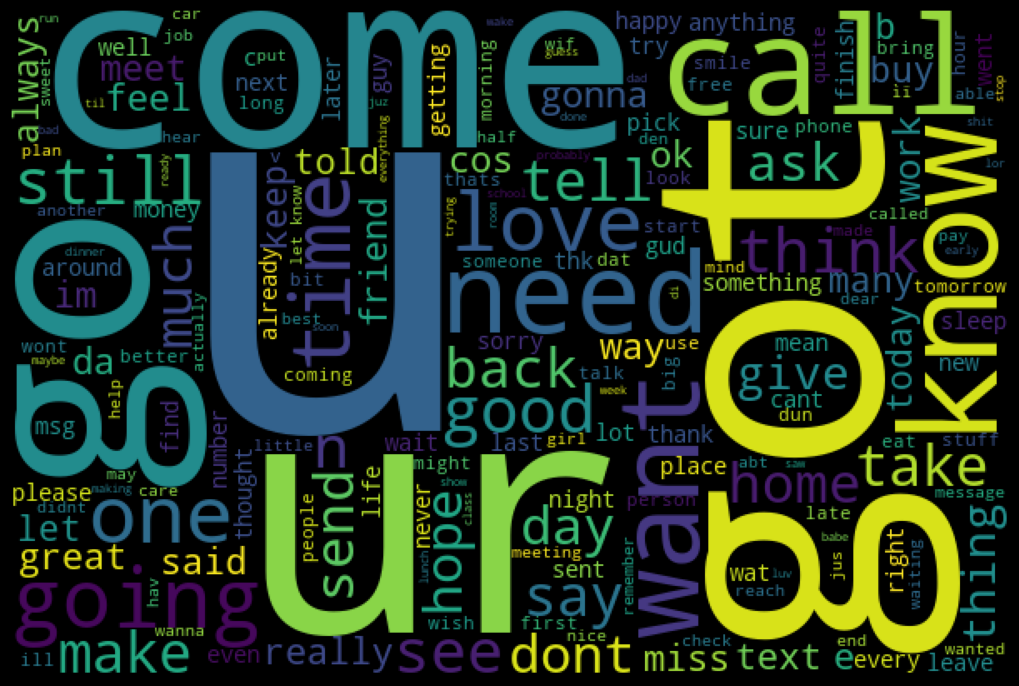

In [30]:
ham_wordcloud = WordCloud(width=600, height=400).generate(' '.join(ham_words))
plt.figure( figsize=(10,8), facecolor='k')
plt.imshow(ham_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

**Wordcloud for ham messages shows that words like got, come, go, ur, know, call etc. are widely used, let's check them statistically.**

In [31]:
print("Top 10 Ham words are :\n")
print(pd.Series(ham_words).value_counts().head(10))

Top 10 Ham words are :

u        820
get      287
ur       235
go       231
got      216
like     215
know     202
come     201
call     200
going    151
Name: count, dtype: int64


# Data Transformation

Lets clean our data by removing punctuations/ stopwords.

In [32]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [33]:
# This might take a while....

# Lets remove punctuations/ stopwords from all SMS 
messages["message"] = messages["message"].apply(text_preprocess)

In [34]:
# Conver the SMS into string from list
messages["message"] = messages["message"].agg(lambda x: ' '.join(map(str, x)))

C:\Users\gcher\AppData\Local\Temp\ipykernel_17792\3197290416.py:2: FutureWarning: using <function <lambda> at 0x00000199E60A9E40> in Series.agg cannot aggregate and has been deprecated. Use Series.transform to keep behavior unchanged.
  messages["message"] = messages["message"].agg(lambda x: ' '.join(map(str, x)))


In [35]:
messages.head()

,label,message,length
0,ham,go jurong point crazy available bugis n great ...,111
1,ham,ok lar joking wif u oni,29
2,spam,free entry wkly comp win fa cup final tkts may...,155
3,ham,u dun say early hor u c already say,49
4,ham,nah dont think goes usf lives around though,61


In [36]:
messages["message"][7]

'per request melle melle oru minnaminunginte nurungu vettam set callertune callers press copy friends callertune'

# Continuing Normalization

Il existe de nombreuses façons de poursuivre la normalisation du texte. Par exemple, **Stemming** ou distinction par **partie du discours**.

NLTK dispose de nombreux outils intégrés. Cependant, il arrive qu'ils ne fonctionnent pas bien pour les messages textuels en raison de la façon dont beaucoup de gens ont tendance à utiliser des abréviations ou des raccourcis, par exemple :
    
    Nah dawg, IDK ! À quelle heure tu vas au club ?
    
contre

    No dog, I don't know ! À quelle heure vas-tu au club ?
    
Certaines méthodes de normalisation de texte ont des difficultés avec ce type d'abréviation et nous ne les utiliserons donc pas ici. Pour l'instant, nous nous contenterons d'utiliser ce que nous avons pour convertir notre liste de mots en un vecteur réel que SciKit-Learn peut utiliser.

## Vectorization

Actuellement, les messages sont représentés sous forme de listes de tokens (également connus sous le nom de lemmes) et nous devons maintenant convertir chacun de ces messages en un vecteur avec lequel les modèles algorithmiques de SciKit Learn peuvent travailler.

Nous allons maintenant convertir chaque message, représenté comme une liste de tokens (lemmes), en un vecteur que les modèles d'apprentissage automatique peuvent comprendre.

Nous le ferons en trois étapes en utilisant le modèle **bag-of-words** :

1. Compter le nombre d'occurrences d'un mot dans chaque message (appelé fréquence des termes ou **TF**).

2. Pondérer les comptes, de sorte que les mots fréquents aient moins de poids (fréquence inverse des documents ou **IDF**).

3. Normaliser les vecteurs à une longueur unitaire, pour faire abstraction de la longueur du texte original (norme L2).

Commençons par la première étape :

Chaque vecteur aura autant de dimensions qu'il y a de mots uniques dans le corpus SMS.  Nous allons d'abord utiliser le **CountVectorizer** de SciKit Learn. Ce modèle convertit une collection de documents textuels en une matrice de comptage de jetons.

Countvectorizer compte le nombre de fois qu'un mot apparaît dans les messages et utilise cette valeur comme poids.

Nous pouvons l'imaginer comme une matrice à deux dimensions. La première dimension correspond à l'ensemble du vocabulaire (une ligne par mot) et l'autre dimension correspond aux documents proprement dits, dans ce cas une colonne par message textuel. 

Comme il y a beaucoup de messages, on peut s'attendre à ce qu'il y ait beaucoup de zéros pour la présence de ce mot dans ce document. C'est pourquoi SciKit Learn produira une matrice éparse.

## Creating the Bag of Words

In [37]:
# Creating the Bag of Words

# Note the here we are passing already process messages (after removing punctuations and stopwords)

vectorizer = CountVectorizer()
bow_transformer = vectorizer.fit(messages['message'])

print("20 Bag of Words (BOW) Features: \n")
print(vectorizer.get_feature_names_out()[20:40])

print("\nTotal number of vocab words : ",len(vectorizer.vocabulary_))

20 Bag of Words (BOW) Features: 

['absence' 'absolutely' 'abstract' 'abt' 'abta' 'aburo' 'abuse' 'abusers'
 'ac' 'academic' 'acc' 'accent' 'accenture' 'accept' 'access' 'accessible'
 'accidant' 'accident' 'accidentally' 'accommodation']

Total number of vocab words :  8084


Let's take one text message and get its bag-of-words counts as a vector, putting to use our new `bow_transformer`:

In [38]:
message4 = messages['message'][3]
print(message4)

u dun say early hor u c already say


Now let's see its vector representation:

In [39]:
# fit_transform : Learn the vocabulary dictionary and return term-document matrix.
bow4 = bow_transformer.transform([message4])
print(bow4)
print(bow4.shape)

  (0, 207)	1
  (0, 1981)	1
  (0, 2000)	1
  (0, 3141)	1
  (0, 5945)	2
(1, 8084)


This means that there are seven unique words in message number 4 (after removing common stop words). Let's go ahead and check and confirm which ones appear twice:

In [42]:
print(bow_transformer.get_feature_names_out()[0])

aa


#### Nous pouvons maintenant utiliser **.transform** sur notre objet transformé Bag-of-Words (bow) et transformer l'ensemble du DataFrame de messages. Allons-y et vérifions que le nombre de sacs de mots pour l'ensemble du corpus SMS est une matrice large et éparse :

In [43]:
messages_bow = bow_transformer.transform(messages['message'])

In [44]:
print('Shape of Sparse Matrix: ', messages_bow.shape)
print('Amount of Non-Zero occurences: ', messages_bow.nnz)

Shape of Sparse Matrix:  (5572, 8084)
Amount of Non-Zero occurences:  44211


After the counting, the term weighting and normalization can be done with TF-IDF.

### TF-IDF

TF-IDF signifie **fréquence de terme-fréquence inverse de document**, et le poids tf-idf est un poids souvent utilisé dans la recherche d'information et l'exploration de texte. Ce poids est une mesure statistique utilisée pour évaluer l'importance d'un mot dans un document d'une collection ou d'un corpus. L'importance augmente proportionnellement au nombre de fois qu'un mot apparaît dans le document, mais est compensée par la fréquence du mot dans le corpus. Des variantes du schéma de pondération tf-idf sont souvent utilisées par les moteurs de recherche comme outil central pour évaluer et classer la pertinence d'un document en fonction de la requête de l'utilisateur.


**TF : fréquence des termes**, qui mesure la fréquence d'apparition d'un terme dans un document. Chaque document étant de longueur différente, il est possible qu'un terme apparaisse beaucoup plus souvent dans les documents longs que dans les documents courts. C'est pourquoi la fréquence des termes est souvent divisée par la longueur du document (c'est-à-dire le nombre total de termes dans le document) à des fins de normalisation : 

$$ TF(t) = \frac{\text{Nombre de fois où le terme t apparaît dans un document}}{\text{Nombre total de termes dans le document}}. $$$
   

**IDF : Inverse Document Frequency**, qui mesure l'importance d'un terme. Lors du calcul de la FT, tous les termes sont considérés comme ayant la même importance. Toutefois, on sait que certains termes, tels que « is », « of » et « that », peuvent apparaître un grand nombre de fois mais n'ont que peu d'importance. Nous devons donc pondérer les termes fréquents et augmenter les termes rares, en calculant ce qui suit : 

$$ IDF(t) = \log_e\Bigg( \frac{\text{Nombre total de documents}}{\text{Nombre de documents contenant le terme t}} \Bigg). $$

Faisons cela dans SciKit Learn.

In [45]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer().fit(messages_bow)

Let's try classifying our single random message and checking how we do:

In [50]:
tfidf4 = tfidf_transformer.transform(bow4)
print(tfidf4)

  (0, 5945)	0.6206136295983186
  (0, 3141)	0.5139528069861297
  (0, 2000)	0.37127907512470754
  (0, 1981)	0.3420160440299522
  (0, 207)	0.3096257562744466


In [51]:
print(bow_transformer.get_feature_names_out()[5945])
print(bow_transformer.get_feature_names_out()[3141])

say
hor


Nous allons vérifier quelle est la FID (fréquence inverse des documents) du mot « say » ?

In [52]:
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['say']])

5.14835197309133


### To transform the entire bag-of-words corpus into TF-IDF corpus at once:

In [53]:
messages_tfidf = tfidf_transformer.transform(messages_bow)
print(messages_tfidf.shape)

(5572, 8084)


In [54]:
print(messages_tfidf)

  (0, 7849)	0.23822187576133733
  (0, 7624)	0.19696340342726038
  (0, 5218)	0.2701917502132373
  (0, 3740)	0.2918335915067389
  (0, 3591)	0.3454453072521403
  (0, 2824)	0.19227005405586492
  (0, 2787)	0.16228382867264401
  (0, 2733)	0.15705625796538664
  (0, 1483)	0.26752361109476797
  (0, 1208)	0.2918335915067389
  (0, 897)	0.2918335915067389
  (0, 895)	0.3297648855969494
  (0, 464)	0.2626832171423389
  (0, 233)	0.3454453072521403
  (1, 7750)	0.4313385731102942
  (1, 4838)	0.5462557824449175
  (1, 4806)	0.2741803362458879
  (1, 3776)	0.4080505634471753
  (1, 3559)	0.5233273701797004
  (2, 7803)	0.21180477976633422
  (2, 7764)	0.1655268599567031
  (2, 7295)	0.14030009452821
  (2, 7092)	0.2454421736459655
  (2, 6937)	0.1372922225787766
  (2, 5602)	0.18586214999858788
  :	:
  (5568, 3108)	0.3660732290385455
  (5568, 2749)	0.3636095248537397
  (5568, 2520)	0.5628210076825846
  (5568, 2152)	0.6457639024659789
  (5569, 6714)	0.520467167163554
  (5569, 6350)	0.520467167163554
  (5569, 5157)	

In [55]:
messages["message"][:10]

0    go jurong point crazy available bugis n great ...
1                              ok lar joking wif u oni
2    free entry wkly comp win fa cup final tkts may...
3                  u dun say early hor u c already say
4          nah dont think goes usf lives around though
5    freemsg hey darling weeks word back id like fu...
6       even brother like speak treat like aids patent
7    per request melle melle oru minnaminunginte nu...
8    winner valued network customer selected receiv...
9    mobile months u r entitled update latest colou...
Name: message, dtype: object

### Convertissons notre texte propre en une représentation qu'un modèle d'apprentissage automatique peut comprendre. J'utiliserai pour cela le Tfifd.

In [57]:
from sklearn.feature_extraction.text import TfidfVectorizer

vec = TfidfVectorizer(encoding = "latin-1", strip_accents = "unicode", stop_words = "english")
features = vec.fit_transform(messages["message"])
print(features.shape)

print(len(vec.vocabulary_))

(5572, 7927)
7927


Il existe de nombreuses façons de prétraiter et de vectoriser les données. Ces étapes impliquent l'ingénierie des caractéristiques et la construction d'un « pipeline ». Je vous encourage à consulter la documentation de SciKit Learn sur le traitement des données textuelles ainsi que la vaste collection d'articles et de livres disponibles sur le sujet général du NLP.

# Model Evaluation

Les messages étant représentés sous forme de vecteurs, nous pouvons enfin entraîner notre classificateur de spam/ham. Nous pouvons maintenant utiliser presque tous les types d'algorithmes de classification. Pour diverses raisons, l'algorithme de classification Naive Bayes est un bon choix.

Nous utiliserons ici scikit-learn, en choisissant pour commencer le classificateur Naive Bayes :

#### Encodage des étiquettes de classe dans la variable cible (non obligatoire)

Le codage de la variable cible (ici l'étiquette spam ou ham) sous forme numérique est idéal avant que les données ne soient transmises aux algorithmes d'apprentissage automatique. Je n'y reviens pas car Naive Bayes peut travailler avec une variable cible catégorielle. 

In [58]:
# FactorResult=pd.factorize(messages['label'])
# messages['label'] = FactorResult[0]
# messages.head()

## Train Test Split

In [59]:
msg_train, msg_test, label_train, label_test = \
train_test_split(messages_tfidf, messages['label'], test_size=0.2)

In [61]:
print("train dataset features size : ",msg_train.shape)
print("train dataset label size", label_train.shape)

print("\n")

print("test dataset features size", msg_test.shape)
print("test dataset lable size", label_test.shape)

train dataset features size :  (4457, 8084)
train dataset label size (4457,)


test dataset features size (1115, 8084)
test dataset lable size (1115,)


In [63]:
msg_train

<4457x8084 sparse matrix of type '<class 'numpy.float64'>'
	with 35780 stored elements in Compressed Sparse Row format>

La taille du test est de 20 % de l'ensemble des données (1115 messages sur un total de 5572), et l'entraînement est le reste (4457 sur 5572). Notez que la répartition par défaut aurait été de 30/70.

## Building Naive Bayes classifier Model

Let's create a Naive Bayes classifier Model using Scikit-learn.

In [64]:
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB()
spam_detect_model = clf.fit(msg_train, label_train)

In [65]:
predict_train = spam_detect_model.predict(msg_train)

In [66]:
print("Classification Report \n",metrics.classification_report(label_train, predict_train))
print("\n")
print("Confusion Matrix \n",metrics.confusion_matrix(label_train, predict_train))
print("\n")
print("Accuracy of Train dataset : {0:0.3f}".format(metrics.accuracy_score(label_train, predict_train)))

Classification Report 
               precision    recall  f1-score   support

         ham       0.97      1.00      0.98      3839
        spam       1.00      0.80      0.89       618

    accuracy                           0.97      4457
   macro avg       0.98      0.90      0.94      4457
weighted avg       0.97      0.97      0.97      4457



Confusion Matrix 
 [[3839    0]
 [ 121  497]]


Accuracy of Train dataset : 0.973


Let's try classifying our single random message and checking how we do:

In [67]:
print('predicted:', spam_detect_model.predict(tfidf4)[0])
print('expected:', messages['label'][3])

predicted: ham
expected: ham


In [69]:
messages['message'][3]

'u dun say early hor u c already say'

## Model Evaluation
Nous voulons maintenant déterminer la performance globale de notre modèle sur l'ensemble des données. Commençons par obtenir toutes les prédictions :

In [71]:
label_predictions = spam_detect_model.predict(msg_test)
print(label_predictions)

['ham' 'ham' 'ham' ... 'ham' 'spam' 'spam']


Nous pouvons utiliser le rapport de classification intégré de SciKit Learn, qui renvoie le score f1 de précision et de rappel, ainsi qu'une colonne pour le soutien (c'est-à-dire le nombre de cas qui soutiennent cette classification).

In [72]:
print(metrics.classification_report(label_test, label_predictions))
print(metrics.confusion_matrix(label_test, label_predictions))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       986
        spam       1.00      0.81      0.89       129

    accuracy                           0.98      1115
   macro avg       0.99      0.90      0.94      1115
weighted avg       0.98      0.98      0.98      1115

[[986   0]
 [ 25 104]]


There are quite a few possible metrics for evaluating model performance. Which one is the most important depends on the task and the business effects of decisions based off of the model. For example, the cost of mis-predicting "spam" as "ham" is probably much lower than mis-predicting "ham" as "spam".

In [73]:
# Printing the Overall Accuracy of the model
print("Accuracy of the model : {0:0.3f}".format(metrics.accuracy_score(label_test, label_predictions)))

Accuracy of the model : 0.978
